Todos los grupos deberán hacer:

*Un programa que determine el punto crítico, los esfuerzos principales y cortantes en la sección A de la barra (no considerar el concentrador de esfuerzos), ante fuerzas Fy. Cálculo de esfuerzos principales y esfuerzo cortante máximo.



**PREGUNTA 1**

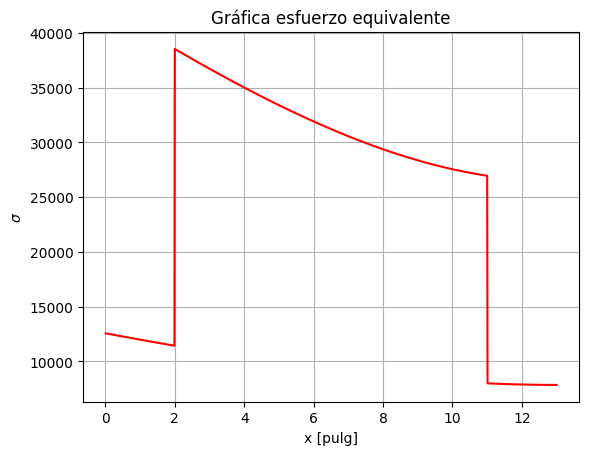


EL PUNTO CRITICO SE ENCUENTA CUANDO X = 2.0000000000000013 pulg.
EN LA SECCIÓN DE DIAMETRO 1 pulg. (Es decir en el punto A)
ESFUERZO EQUIVALENTE IGUAL A 38535.22112901524 psi.


In [184]:
# EVALUACION DEL PUNTO CRITICO
import matplotlib.pyplot as plt
import numpy as np
# DATOS
L1 = 13   #pulg
L2 = 12   #pulg
Ry = 250  #lbf
F = 250   #lbf
D = 1.5    #pulg
r = 0.5   #pulg
c = 0.5   #pulg
x = 2     ##pulg

# FORMULAS 
Mx = F*L2

# Creamos listas para almacenar los valores 
valores_sigma = []
valores_x =  [] 
valores_D = []
# variable x  que representa la distancia de 0 13 pulg. 
x = 0

for i in range(0, 1300):
    x += 0.01
    if x > 2 and x < 11:
        D = 1
    elif x >= 11:
        D = 1.5 
    Mz = np.abs(-F*(L1-x))
    tau_xz = 16/(np.pi)*(Mx/(D)**3)   
    sigma_x = 32/(np.pi)*(Mz/(D)**3)  

    sigma = np.sqrt(sigma_x**2 + 3*tau_xz**2)
    valores_sigma.append(sigma)
    valores_x.append(x)
    valores_D.append(D)

max_val = sorted(valores_sigma)[-1]
max_index = valores_sigma.index(max_val)

pos_x = valores_x[max_index]
D_usado = valores_D[max_index]

# Crear la figura y los ejes
fig, ax = plt.subplots()
# Graficar los datos
ax.plot(valores_x, valores_sigma, color='red')
# Agregar título y etiquetas de los ejes
ax.set_title('Gráfica esfuerzo equivalente')
ax.set_xlabel('x [pulg]')
ax.set_ylabel(r'$\sigma$')
ax.grid()
# Mostrar la gráfica
plt.show()
ax.set_xlim([0, 13])

print('')
print(f'EL PUNTO CRITICO SE ENCUENTA CUANDO X = {pos_x} pulg.')
print(f'EN LA SECCIÓN DE DIAMETRO {D_usado} pulg. (Es decir en el punto A)')
print(f'ESFUERZO EQUIVALENTE IGUAL A {max_val} psi.')



In [ ]:
import numpy as  np

# DATOS
L1 = 13   #pulg
L2 = 12   #pulg
Ry = 250  #lbf
F = 250   #lbf
d = 1    #pulg
r = 0.5   #pulg
c = 0.5   #pulg
x = 2     ##pulg

# FORMULAS 
Mx = F*L2
Mz = np.abs(-F*(L1-x))

tau_xy = 16/(3*np.pi)*(Ry/(d)**2)  #Esfuerzo cortante 
tau_xz = 16/(np.pi)*(Mx/(d)**3)    #Esfuerzo por torsion
tau_zy = 0

sigma_x = 32/(np.pi)*(Mz/(d)**3)  #Esfuerzo por flexion
sigma_y = 0
sigma_z = 0

# ESFUERZOS PRINCIPALES 
sigma_1 = (sigma_x + sigma_y)/2 + np.sqrt(((sigma_x - sigma_y)/2)**2 + tau_xz**2)
sigma_2 = (sigma_x + sigma_y)/2 - np.sqrt(((sigma_x - sigma_y)/2)**2 + tau_xz**2)
tau_1 =  np.sqrt(((sigma_x-sigma_y)/2)**2 + tau_xz**2)
tau_2 =  -np.sqrt(((sigma_x-sigma_y)/2)**2 + tau_xz**2) 

tau_max = (sigma_1 - sigma_2)/2

print(f'\t Esfuerzo contarte Maximo: {tau_max} psi')

print('\t ESFUERZOS PRINCIPALES \n')
print(f'\t Sigma_1: {sigma_1} psi')
print(f'\t Sigma_´2: {sigma_2} psi')
print(f'\t Tau_1: {tau_1} psi')
print(f'\t Tau_2: {tau_2} psi')

	 Esfuerzo contarte Maximo: 20726.838124603382 psi
	 ESFUERZOS PRINCIPALES 

	 Sigma_1: 34732.47311669018 psi
	 Sigma_´2: -6721.203132516592 psi
	 Tau_1: 20726.838124603382 psi
	 Tau_2: -20726.838124603382 psi


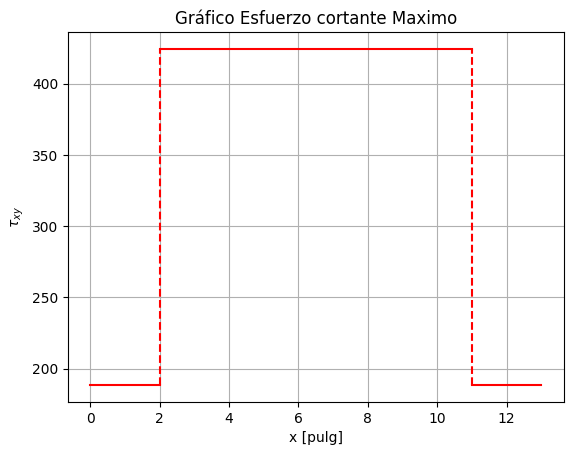

In [ ]:
#  ANEXOS (GRAFICAS QUE SIRVIERON PARA VISUALIZAR MEJOR DONDE SE ENCUENTRA 
#  EL PUNTO CRITICO): 

# GRAFICA ESFUERZO CORTANTE MAXIMO
 
import matplotlib.pyplot as plt
import numpy as np

D = 1.5 #pulg
d1 = 1 #pulg
Ry = 250  #lbf

# Datos de ejemplo
tau_xy_1 = 16/(3*np.pi)*(Ry/(D)**2) 
tau_xy_3 = 16/(3*np.pi)*(Ry/(d1)**2) 
# creamos los vectores 
x1 = np.linspace(0, 2, 20)
x2 = np.linspace(11, 13, 20)
x3 = np.linspace(2, 11, 20)
y1 = np.linspace(tau_xy_1, tau_xy_1, 20)
y3 = np.linspace(tau_xy_3, tau_xy_3, 20)
# Crear la figura y los ejes
fig, ax = plt.subplots()
# Graficar los datos
ax.plot(x1, y1, color='red')
ax.plot(x2, y1, color='red')
ax.plot(x3, y3, color='red')
# unir 
ax.plot([2,2], [tau_xy_1, tau_xy_3], '--', color='red')
ax.plot([11,11], [tau_xy_1, tau_xy_3], '--', color='red')

# Agregar título y etiquetas de los ejes
ax.set_title('Gráfico Esfuerzo cortante Maximo')
ax.set_xlabel('x [pulg]')
ax.set_ylabel(r'$\tau_{xy}$')
ax.grid()
# Mostrar la gráfica
plt.show()


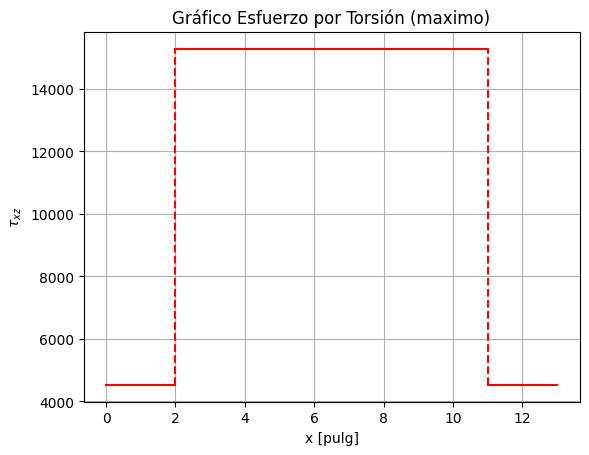

In [ ]:
#GRAFICA ESFUERZO POR TORSIÓN 
import matplotlib.pyplot as plt
import numpy as np

D = 1.5 #pulg
d1 = 1 #pulg
Ry = 250  #lbf
F = 250
L2 = 12
# Datos de ejemplo
Mx = F*L2
tau_maxD = 16/(np.pi)*(Mx/(D)**3) 
tau_maxd1 = 16/(np.pi)*(Mx/(d1)**3) 

# creamos los vectores 
x1 = np.linspace(0, 2, 20)
x2 = np.linspace(11, 13, 20)
x3 = np.linspace(2, 11, 20)
y1 = np.linspace(tau_maxD, tau_maxD, 20)
y3 = np.linspace(tau_maxd1, tau_maxd1, 20)
# Crear la figura y los ejes
fig, ax = plt.subplots()
# Graficar los datos
ax.plot(x1, y1, color='red')
ax.plot(x2, y1, color='red')
ax.plot(x3, y3, color='red')
# unir 
ax.plot([2,2], [tau_maxD, tau_maxd1], '--', color='red')
ax.plot([11,11], [tau_maxD, tau_maxd1], '--', color='red')

# Agregar título y etiquetas de los ejes
ax.set_title('Gráfico Esfuerzo por Torsión (maximo)')
ax.set_xlabel('x [pulg]')
ax.set_ylabel(r'$\tau_{xz}$')
ax.grid()
# Mostrar la gráfica
plt.show()


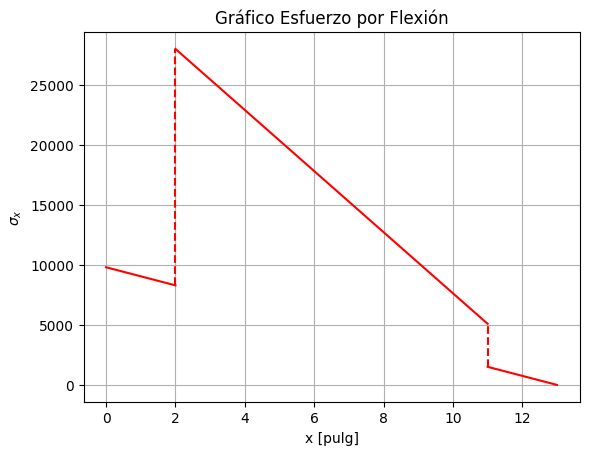

In [ ]:
#GRAFICA ESFUERZO POR FLEXIÓN

import matplotlib.pyplot as plt
import numpy as np

D = 1.5 #pulg
d1 = 1 #pulg
Ry = 250  #lbf
F = 250
L1 = 13
# x variable 0 a 13 
# Datos de ejemplo

# creamos los vectores 
x1 = np.linspace(0, 2, 20)
x2 = np.linspace(11, 13, 20)
x3 = np.linspace(2, 11, 20)

Mz1 =  np.abs(-F*(L1- x1))
Mz2 =  np.abs(-F*(L1- x2))
Mz3 =  np.abs(-F*(L1- x3))

sigma_D1 = 32/(np.pi)*(Mz1/(D)**3) 
sigma_D2 = 32/(np.pi)*(Mz2/(D)**3) 

sigma_d1 = 32/(np.pi)*(Mz3/(d1)**3) 

y1 = 32/(np.pi)*((2*250)/(D)**3)
y2 = 32/(np.pi)*((11*250)/(D)**3)
y3 = 32/(np.pi)*((2*250)/(d1)**3)
y4 = 32/(np.pi)*((11*250)/(d1)**3)

# Crear la figura y los ejes
fig, ax = plt.subplots()
# Graficar los datos
ax.plot(x1, sigma_D1, color='red')
ax.plot(x2, sigma_D2, color='red')
ax.plot(x3, sigma_d1, color='red')

# unir 
ax.plot([2,2], [y2, y4], '--', color='red')
ax.plot([11,11], [y1, y3], '--', color='red')

# Agregar título y etiquetas de los ejes
ax.set_title('Gráfico Esfuerzo por Flexión(Maximo)')
ax.set_xlabel('x [pulg]')
ax.set_ylabel(r'$\sigma_{x}$')
ax.grid()
# Mostrar la gráfica
plt.show()

**PREGUNTA DEL GRUPO 4**

**Grupo 4**

Programa que determine si la barra falla según la teoría de energía de distorsión (para una entrada de esfuerzos), con el N factor de seguridad variable. En base a la tabla A-20 crear una base de datos (tabla excel) que clasifique a los materiales según si producen fallas o no (de acuerdo al anterior inciso)

In [209]:
# para que no exista interferencias con las variables usadas anteriormente.
from IPython import get_ipython
get_ipython().magic('reset -sf')
# importamos  las librerias que usaremos
from google.colab import files,drive
import pandas as pd
from datetime import datetime
import numpy as np 

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [210]:
# Carga el archivo de datos en un DataFrame de Pandas
url = "https://docs.google.com/spreadsheets/d/1RaQ-OtSJIdCf93z1MytrL1WgnkeoST0_/edit?usp=sharing&ouid=113180836124525745873&rtpof=true&sd=true"
file_id = url.split("/")[-2]
df = pd.read_excel(f"https://drive.google.com/uc?id={file_id}")

In [211]:


# Obtenemos los datos del archivo excel, la cual lo pasamos a lista usando el metodo .tolist()
material = df.iloc[0:, 1].tolist()
procesamiento = df.iloc[0:, 2].tolist()
fluencia_mpa = df.iloc[0:, 5].tolist()
fluencia_kpsi = df.iloc[0:, 6].tolist()
estado = []  # Lista para alamacenar si falla o no el material 

while True:  # iniciamos un ciclo while
    tipo_unidades = str(input('\nIngrese el número que desea:\n1. Unidades SI\n2. Unidades Inglesas\n3. Salir \n --> '))
    if tipo_unidades == '1' or tipo_unidades== '2': 
        try: 
            sigma_x = float(input('Ingrese el esfuerzo en X: '))
            sigma_y = float(input('Ingrese el esfuerzo en Y: '))
            sigma_z = float(input('Ingrese el esfuerzo en Z: '))
            Tau_xy = float(input('Ingrese el esfuerzo cortante en XY: '))
            Tau_yz = float(input('Ingrese el esfuerzo cortante en YZ: '))
            Tau_zx = float(input('Ingrese el esfuerzo cortante en ZX: '))
            N = float(input('Ingrese el Factor de Seguridad: '))
            break
        except ValueError:
            print('Ingrese valores validos')
    elif tipo_unidades == '3':
        break  # finalizar el ciclo while 
    else:
        print("Entrada inválida. Intente de nuevo.")

 # Verificamos si  se ingreo 1 o 2 para elegir las unidades seleccionadas
if tipo_unidades == '1' or tipo_unidades== '2':
    sigma = np.sqrt(1/2*((sigma_x-sigma_y)**2 + (sigma_y - sigma_z)**2 +(sigma_z-sigma_x)**2)+ 3*(Tau_xy**2 + Tau_yz**2 + Tau_zx**2))
    if tipo_unidades == '1':   
        for dato in fluencia_mpa:   
            if sigma > (dato*1000000)/N:    # pasamos de MPa a Pa   
                estado.append('Falla')
            else:
                estado.append('No Falla')
    elif tipo_unidades == '2':
        for dato in fluencia_kpsi:   
            if sigma > (dato*1000)/N:    # pasamos de Kpsi a psi  
                estado.append('Falla') # Agregamos el texto  Falla a la lista estado  
            else:
                estado.append('No Falla') # Agregamos el texto No Falla a la lista estado 
    else:
        print('Error, Debe Ingresar el numero 1 o 2')

    #Creamos una lista de valores para agregar al excel
    sigma_x_list  = [sigma_x]*23
    sigma_y_list = [sigma_y]*23
    sigma_z_list = [sigma_z]*23
    Tau_xy_list = [Tau_xy]*23
    Tau_yz_list = [Tau_yz]*23
    Tau_zx_list = [Tau_zx]*23
    N_list = [N]*23

    # creamos un diccionario llamado datos la cual contiene el encabezado y cada columna en forma de lista
    datos = {     
            'Sigma_x': sigma_x_list,
            'Sigma_y': sigma_y_list,
            'Sigma_z': sigma_z_list,
            'Tau_xy': Tau_xy_list,
            'Tau_yz': Tau_yz_list,
            'Tau_zx': Tau_zx_list,
            'Factor de Seguridad': N_list,
            'Material':material, 
            'Procesamiento':procesamiento, 
            'Resistencia a la Fluencia(MPa)':fluencia_mpa, 
            'Resistencia a la Fluencia(kpsi)':fluencia_kpsi,
            'Estado': estado,
             }

    # Creamos un dataFrame usando pandas asignamos los datos, y nombres de las columnas
    df = pd.DataFrame(datos, columns =  [
                                        'Sigma_x',
                                        'Sigma_y',
                                        'Sigma_z',
                                        'Tau_xy',
                                        'Tau_yz',
                                        'Tau_zx',
                                        'Factor de Seguridad',
                                        'Material', 
                                        'Procesamiento', 
                                        'Resistencia a la Fluencia(MPa)', 
                                        'Resistencia a la Fluencia(kpsi)', 
                                        'Estado'
                                         ])
    # Guarda el archivo Excel 
    fecha_actual = datetime.now().strftime('%Y-%m-%d') # Obtenemos la fecha
    df.to_excel(f'DATOS {fecha_actual}.xlsx')
    print('DATOS GUARDADOS CORRECTAMENTE')




Ingrese el número que desea:
1. Unidades SI
2. Unidades Inglesas
3. Salir 
 --> 1
Ingrese el esfuerzo en X: 80000000
Ingrese el esfuerzo en Y: 0
Ingrese el esfuerzo en Z: 0
Ingrese el esfuerzo cortante en XY: 70000000
Ingrese el esfuerzo cortante en YZ: 0
Ingrese el esfuerzo cortante en ZX: 0
Ingrese el Factor de Seguridad: 2
DATOS GUARDADOS CORRECTAMENTE


0